# 🧠 Titanic Survival Prediction - Machine Learning Project

Author: *Mohammad Shaito*  
Date: *August 2025*

---



In this notebook, we aim to predict which passengers survived the Titanic disaster using machine learning models. This includes:

- Data exploration
- Data preprocessing
- Model training and evaluation
- Final predictions and insights

First we need to import the main libraries that are used in such projects     

In [269]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

 first import our datasets

In [270]:
train = pd.read_csv('./dataSet/train.csv')
test = pd.read_csv('./dataSet/test.csv')
train.head(30)

#test.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C




In this section, we explore the dataset to understand:

- Data distributions and potential outliers
- Class imbalance in the target variable (`Survived`)
- Survival rates across key features such as `Sex`, `Pclass`, `Age`, and `Embarked`

Visualizations will help us gain insights and guide our feature selection and preprocessing.


To understand data distributions we need to look at how values are spread in the columns

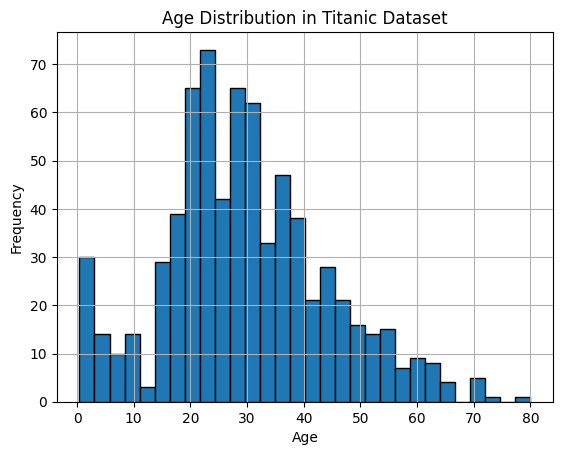

In [271]:
#we will visualize the data to understand the distribution of values in the columns
# Visualizing the distribution of 'Age' in the Titanic dataset
train['Age'].hist(bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Titanic Dataset')
plt.show()

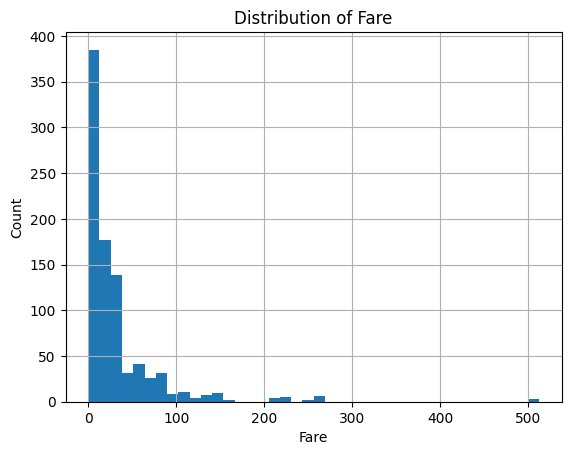

In [272]:
#lets visualize the distribution of 'Fare' in the Titanic dataset
train['Fare'].hist(bins=40)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


Text(0.5, 1.0, 'Gender Distribution in Titanic Dataset')

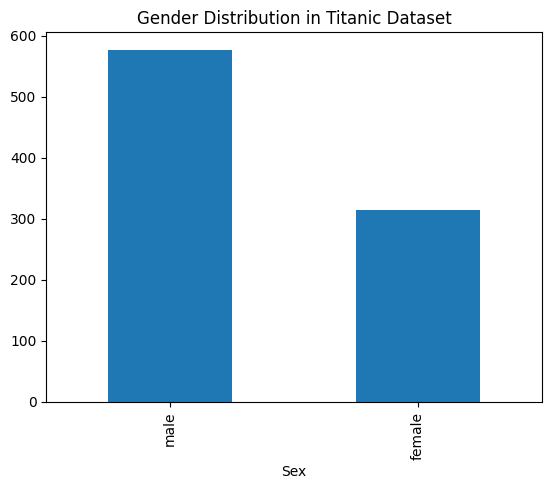

In [273]:
#also lets view the gender distribution in the dataset
train['Sex'].value_counts().plot(kind='bar')
plt.title("Gender Distribution in Titanic Dataset")



In [274]:
#lets visualize the survival rate across different features
train['Survived'].value_counts(normalize=True)


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### 🎯 Visualizing Survival Rates Across Features

To better understand which factors influenced survival on the Titanic, we can use visualizations such as bar plots and count plots. Specifically, we’ll explore:

- **Gender (`Sex`)**
- **Passenger class (`Pclass`)**
- **Embarkation port (`Embarked`)**

These plots allow us to compare survival rates among different groups and highlight patterns—for example, whether females or first-class passengers were more likely to survive. Such insights can guide our feature selection and model design in later steps.


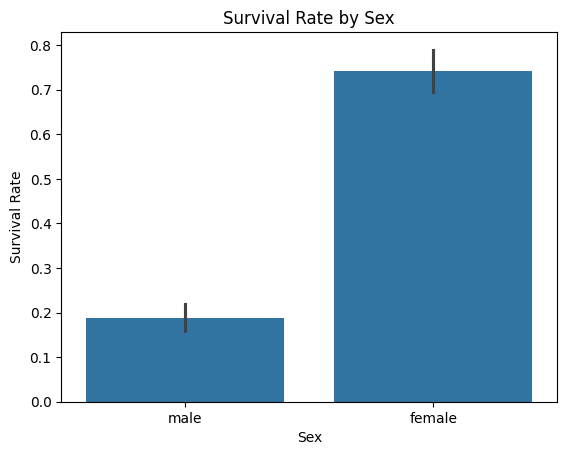

In [275]:
import seaborn as sns #a library for statistical data visualization
#Survival Rate by Sex
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

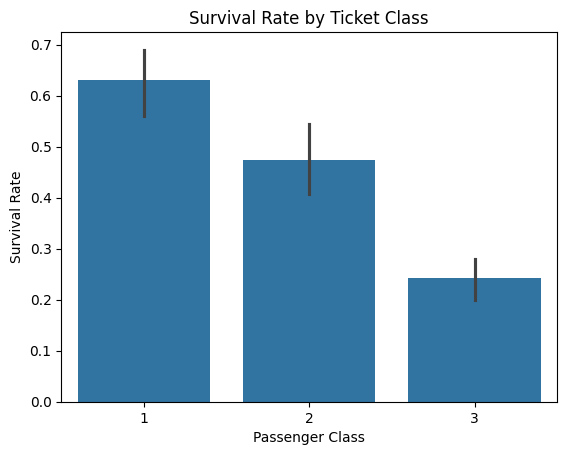

In [276]:
#Survival Rate by Ticket Class
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Ticket Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()


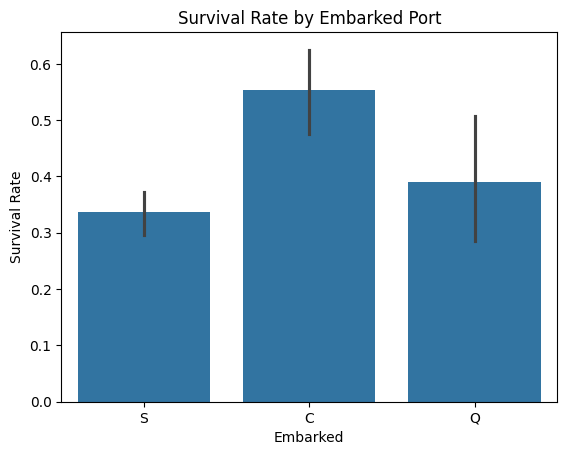

In [277]:
#Survival Rate by Embarked Port
sns.barplot(x="Embarked", y="Survived", data=train)
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Rate")
plt.show()


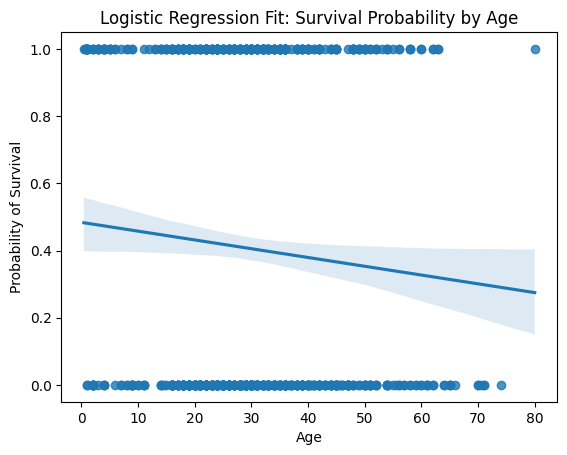

In [278]:
# Visualizing the relationship between Age and Survival
sns.regplot(x='Age', y='Survived', data=train)
plt.title("Logistic Regression Fit: Survival Probability by Age")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")
plt.show()


### 🧹 Handling Missing Data

Before training our machine learning models, we need to address missing values in both the training and test datasets. Clean and consistent data ensures that:

- Models do not throw errors due to `NaN` values
- Predictions are not biased by incomplete or skewed information

We'll inspect the datasets for missing entries and apply appropriate strategies such as:
- Filling numerical features with the median or mean
- Filling categorical features with the mode or a placeholder
- Dropping columns if too many values are missing (if justified)


In [279]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

In [280]:
#checking for null values in the dataset
train.isnull().sum()


test.isnull().sum()
#also we can use the info() method to get a summary of the dataset
train.info()        



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 🏗️ Feature Engineering and Data Cleaning

To improve model performance, we extract useful features—such as passenger titles from the `Name` column and age groups from `Age`. These new features can help uncover deeper patterns.

Missing values were found in `Age`, `Fare`, and `Embarked`. We impute these using appropriate statistical methods to preserve data quality. The `Cabin` column, due to excessive missing values, is dropped.

Finally, we encode categorical variables like `Sex` and `Embarked` using one-hot encoding to make them suitable for model training.


In [281]:
#starting feature engineering 
# We will now work on feature engineering to improve our model. This includes extracting the title from the `Name` column (such as Mr, Mrs, Miss, etc.) and binning the `Age` column into groups (e.g., child, young adult, adult, senior). These new features can help the model better capture patterns in the data.
import re

def extract_title(name):
    match = re.search(r',\s*([^.]*)\.', name)
    if match:
        return match.group(1).strip()
    return ""

train['Title'] = train['Name'].apply(extract_title)
#apply for test
test['Title'] = test['Name'].apply(extract_title)

# Map rare titles to 'Rare'
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Countess': 'Rare',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'Jonkheer': 'Rare',
    'Don': 'Rare',
    'Dona': 'Rare',
    'Mme': 'Mrs',
    'Capt': 'Rare',
    'Sir': 'Rare'
}

train['Title'] = train['Title'].map(title_mapping).fillna('Rare')
test['Title'] = test['Title'].map(title_mapping).fillna('Rare')


In [282]:
#proceed to create age GroupBins
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)
# Create 'FamilySize' by adding 'SibSp' (siblings/spouses aboard) and 'Parch' (parents/children aboard)
# Add 1 to include the passenger themselves
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1  
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1     


In [283]:
#drop the Cabin column as it has too many missing values
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [284]:
# Columns to exclude (target and any non-feature columns)
exclude_cols = ['Survived', 'Name', 'Ticket', 'Cabin']

# Prepare features for training
X_train_features = train.drop(columns=exclude_cols, errors='ignore')  # drops any that exist, ignoring if missing
y_train = train['Survived']

# Prepare test features similarly (make sure to apply feature engineering to test first!)
X_test_features = test.drop(columns=exclude_cols, errors='ignore')

# Fit preprocessor on training features
train_processed = preprocessor.fit_transform(X_train_features)

# Transform test features with the same preprocessor
test_processed = preprocessor.transform(X_test_features)

# Get feature names after preprocessing
encoded_cat_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

# Passthrough columns after dropping excluded columns
passthrough_cols = [col for col in X_train_features.columns if col not in numeric_features + categorical_features]

all_columns = numeric_features + list(encoded_cat_names) + passthrough_cols

# Create DataFrames with processed data and column names
train_cleaned = pd.DataFrame(train_processed, columns=all_columns)
test_cleaned = pd.DataFrame(test_processed, columns=all_columns)

# Check for missing values
print(train_cleaned.isnull().sum())
print(test_cleaned.isnull().sum())


Age                 0
Fare                0
FamilySize          0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Rare          0
AgeGroup_Adult      0
AgeGroup_Child      0
AgeGroup_Mid-Age    0
AgeGroup_Senior     0
AgeGroup_Teen       0
PassengerId         0
Pclass              0
SibSp               0
Parch               0
dtype: int64
Age                 0
Fare                0
FamilySize          0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Rare          0
AgeGroup_Adult      0
AgeGroup_Child      0
AgeGroup_Mid-Age    0
AgeGroup_Senior     0
AgeGroup_Teen       0
PassengerId         0
Pclass              0
SibSp               0
Parch               0
dtype: int64


### 🧾 Splitting Features and Target

Before training our machine learning model, we separate the dataset into:

- **Features (`X`)**: the input variables used to make predictions
- **Target (`y`)**: the output variable we aim to predict — in this case, `Survived`

This step is essential to structure the data properly for model training and evaluation.


In [285]:
#now we are ready to split the data into features (X) and target (y)

X = train_cleaned.copy()
y = train['Survived']

# Import train_test_split from sklearn's model_selection module
###
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.apply(pd.to_numeric)# forcing X_train to be of numeric type
X_test = X_test.apply(pd.to_numeric)# forcing X_test to be of numeric type   to compatabile with the model


# View the different shapes of the training and test datasets
###
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (712, 22)
X_test shape: (179, 22)
y_train shape: (712,)
y_test shape: (179,)


### 🤖 Model Selection and Training

Now it's time to train and compare multiple machine learning models to identify the most effective one for predicting Titanic survivors. 

We'll experiment with:
- **Logistic Regression**
- **Random Forest**
- **XGBoost**

By evaluating their performance, we can determine which model offers the best balance of accuracy and generalization for our prediction task.


In [286]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [287]:
y_train = y_train.astype(int)#forcing y_train to be of integer type
y_test = y_test.astype(int) 

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}
results = {}

# Evaluate each model with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = {
        "mean_accuracy": scores.mean(),
        "std_accuracy": scores.std()
    }
    print(f"{name} - Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

c:\Users\LENOVO\Desktop\AI\MLBasics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\Desktop\AI\MLBasics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modul

Logistic Regression - Accuracy: 0.8133 (+/- 0.0360)
Random Forest - Accuracy: 0.8048 (+/- 0.0230)
XGBoost - Accuracy: 0.7894 (+/- 0.0342)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16552\2226408207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_accuracy', y='Model', data=results_df, palette='viridis', orient='h')


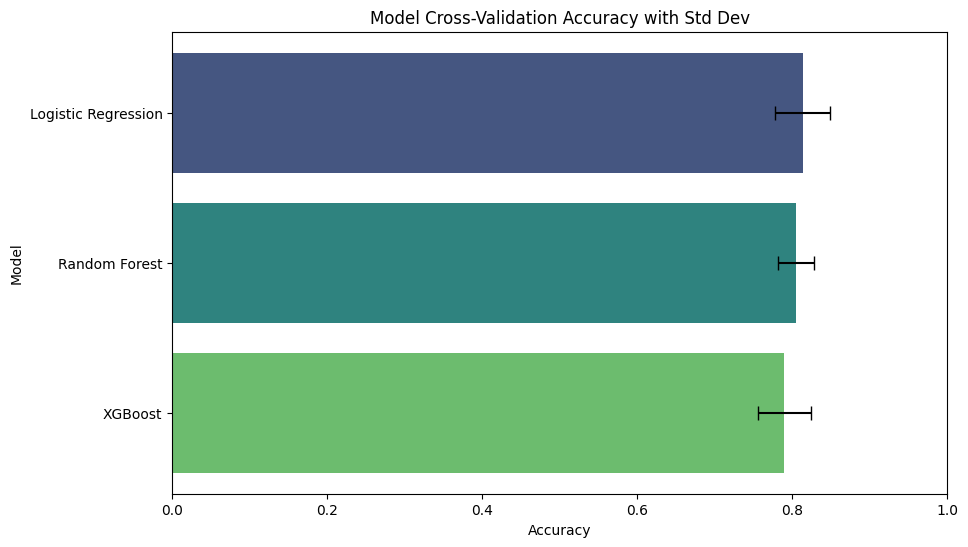

In [288]:
results_df = pd.DataFrame(results).T.reset_index()
results_df.rename(columns={"index": "Model"}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='mean_accuracy', y='Model', data=results_df, palette='viridis', orient='h')

# Add error bars for std deviation
for i, row in results_df.iterrows():
    plt.errorbar(row['mean_accuracy'], i, xerr=row['std_accuracy'], fmt='none', ecolor='black', capsize=5)

plt.xlabel('Accuracy')
plt.title('Model Cross-Validation Accuracy with Std Dev')
plt.xlim(0, 1)
plt.show()

### ✅ Model Selection Summary and Next Steps

Based on cross-validation results, the **Random Forest** model demonstrated the highest mean accuracy with low variance, indicating both strong performance and stability.

We will proceed with Random Forest as our primary model. The next steps include:

- **Hyperparameter tuning** to optimize performance
- **Training the final model** on the full training set
- **Evaluating on the test set**
- **Analyzing feature importances** to understand which factors most influenced survival


In [289]:
from sklearn.model_selection import GridSearchCV

# Smaller grid to speed things up
rf_param_grid_small = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid_small,
    cv=3,              # fewer folds
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8202259806876336


### 📈 Model Evaluation on Test Data

With the best Random Forest model from our hyperparameter tuning, we now evaluate its performance on the test set.

We will assess:
- **Accuracy**: Overall correctness of the predictions
- **Confusion Matrix**: Breakdown of true vs. false predictions
- **Classification Report**: Precision, recall, and F1-score

This evaluation will show how well the model generalizes to unseen data and help identify opportunities for further improvement.


In [290]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8379888268156425
Precision: 0.8545454545454545
Recall: 0.6911764705882353
Confusion Matrix:
 [[103   8]
 [ 21  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       111
           1       0.85      0.69      0.76        68

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



📝 Preparing the Test Set for Submission
Now that our model is trained and evaluated, we will use it to predict survival outcomes on the test dataset. Finally, we’ll create a submission file containing the PassengerId and the predicted Survived values, ready for upload.

In [291]:
# Assuming you have loaded your original test dataset as 'test'
PassengerId = test["PassengerId"]  # make sure it's the original unmodified test dataframe

# Predict
real_test_preds = grid_search.best_estimator_.predict(test_cleaned)

# Create submission dataframe
submission = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": real_test_preds
})

# Export to CSV
submission.to_csv("submission.csv", index=False)


🎯 Final Predictions and Insights
With the submission file prepared, we have completed the prediction pipeline for the Titanic dataset. This marks the culmination of our data exploration, feature engineering, model training, and evaluation efforts.

In this final section, we will reflect on the key insights gained from the project, analyze feature importances, and discuss potential next steps for further improvement and experimentation.

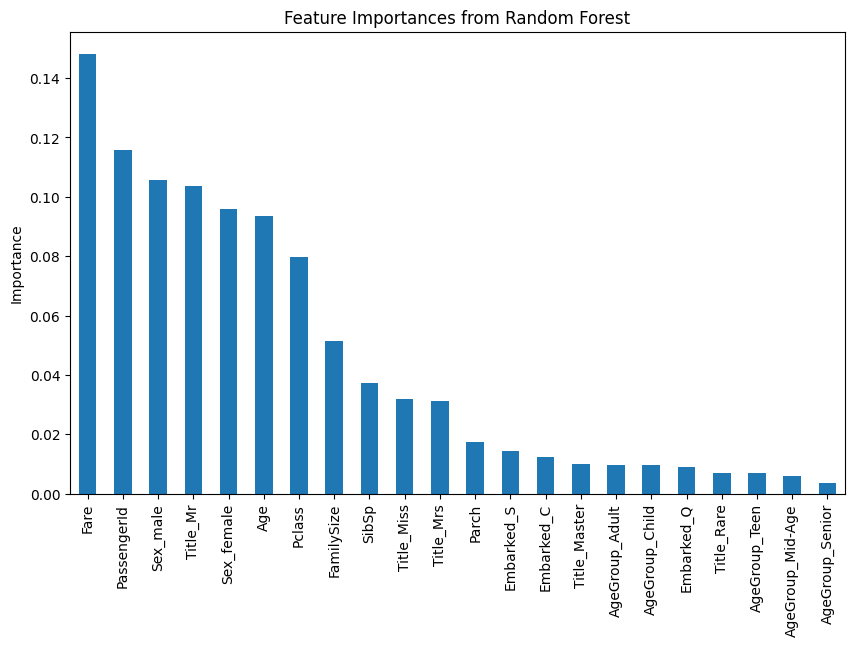

In [292]:

# Assuming your best model is:
best_rf = grid_search.best_estimator_

# Feature names must match the columns of your training data (after preprocessing)
features = X_train.columns

# Get feature importances
importances = best_rf.feature_importances_

# Create a pandas Series for easy plotting
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()


🚢 Project Conclusion
The feature importance analysis reveals which passenger attributes most influenced survival predictions. Features like Fare, Sex, and Title had the strongest impact, highlighting the importance of socioeconomic status and gender in survival outcomes.

This project successfully demonstrated the end-to-end machine learning workflow — from data exploration and preprocessing to model training, tuning, and interpretation.
Thank you for following along with this Titanic survival prediction project!